# Observing a galaxy with MICADO in wide-field MCAO mode

In this example we will generate a basic galaxy object with the help of the ``ScopeSim_templates`` package.
We will then create a model of the ELT+MAORY+MICADO optical system using the ``MICADO`` package. 

### TL;DR

In [1]:
import datetime
from astropy import units as u
import scopesim as sim
import scopesim_templates as sim_tp

gal = sim_tp.extragalactic.galaxies.spiral_two_component(extent=16*u.arcsec, fluxes=(15, 15)*u.mag)

cmd = sim.UserCommands(use_instrument="MICADO", set_modes=["SCAO", "IMG_4mas"])
cmd.update(properties={
    "!OBS.filter_name_fw1": "open", 
    "!OBS.filter_name_fw2": "H", 
    "!OBS.ndit": 1, 
    "!OBS.dit": 3600,

    "!OBS.catg": "SCIENCE",
    "!OBS.tech": "IMAGE",
    "!OBS.type": "OBJECT",
    "!OBS.mjdobs": datetime.datetime(2022, 1, 1, 2, 30, 0)
})

cmd["!DET.width"] = 4096     # pixel
cmd["!DET.height"] = 4096

micado = sim.OpticalTrain(cmd)
micado.observe(gal)
hdus = micado.readout()

https://scopesim.univie.ac.at/scopesim_templates/spiral_two_component.fits
INFO - emission not found in either '.meta' or '.table': [ELT]
INFO - emission not found in either '.meta' or '.table': [I00_EntrWin]
INFO - emission not found in either '.meta' or '.table': [I09_SCAO_PO]
INFO - emission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emissivity not found in either '.meta' or '.table': [I01_Fold1]
INFO - transmission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emissivity not found in either '.meta' or '.table': [I02_Coli1]
INFO - transmission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emissivity not found in either '.meta' or '.table': [I03_Coli2]
INFO - transmission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emission not found in either '.meta' or '.table': [I04_Coli3]
INFO - emiss

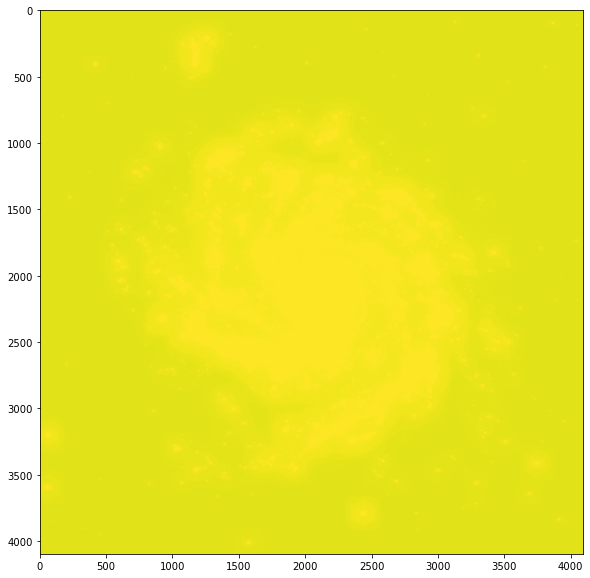

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(figsize=(10,10))
plt.imshow(hdus[0][1].data, norm=LogNorm())